Saving nba_combined.csv to nba_combined.csv
Saving wnba_combined.csv to wnba_combined.csv


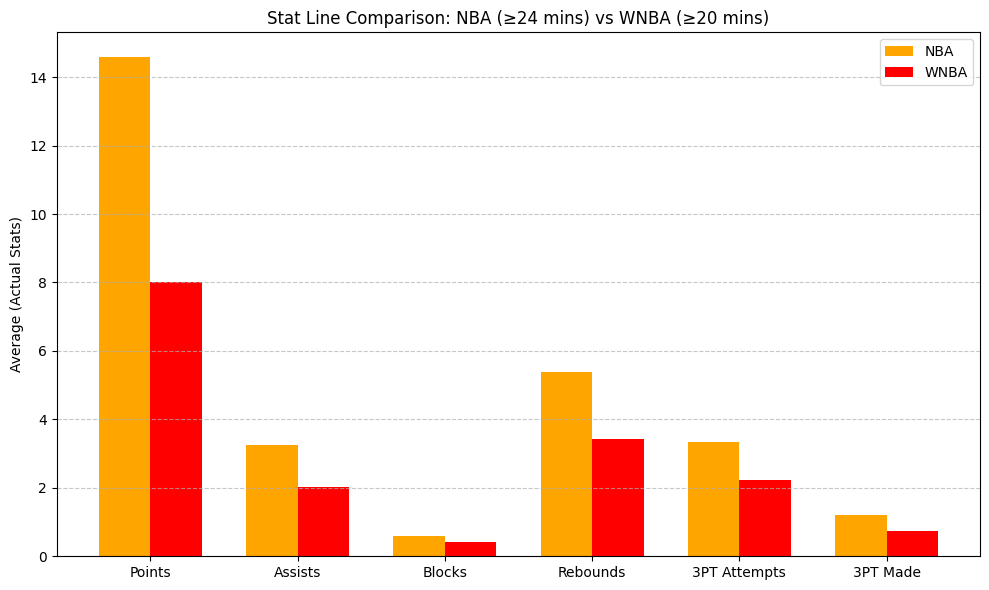

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
nba_raw = pd.read_csv("nba_combined.csv")
wnba_raw = pd.read_csv("wnba_combined.csv")

wnba_raw['MP'] = wnba_raw['MP...5']

nba_filtered = nba_raw[nba_raw['MP'] >= 24]
wnba_filtered = wnba_raw[wnba_raw['MP'] >= 20]

stats = {
    'PTS': 'Points',
    'AST': 'Assists',
    'BLK': 'Blocks',
    'TRB': 'Rebounds',
    '3PA': '3PT Attempts',
    '3P': '3PT Made'
}

nba_averages = nba_filtered[list(stats.keys())].mean()

wnba_averages = pd.Series({
    'PTS': wnba_filtered['PTS'].mean(),
    'AST': wnba_filtered['AST'].mean(),
    'BLK': wnba_filtered['BLK'].mean(),
    'TRB': wnba_filtered['REB'].mean(),  #WNBA uses REB instead of TRB
    '3PA': wnba_filtered['3PA'].mean(),
    '3P': wnba_filtered['3P'].mean()
})

stat_line_df = pd.DataFrame({
    'Stat': list(stats.values()),
    'NBA': nba_averages.values,
    'WNBA': wnba_averages.values
}).round(2)

labels = stat_line_df['Stat'].tolist()
nba_values = stat_line_df['NBA'].tolist()
wnba_values = stat_line_df['WNBA'].tolist()

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, nba_values, width, label='NBA', color='orange')
plt.bar(x + width/2, wnba_values, width, label='WNBA', color='red')

plt.ylabel('Average (Actual Stats)')
plt.title('Stat Line Comparison: NBA (≥24 mins) vs WNBA (≥20 mins)')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
